# Chapter 10     
# Simulation as a Road to Insight   

## Put your name below
Luciano Carvalho

## Introduction

Monte Carlo simulation enables data scientists to study the behavior of stochastic processes with complex probability distributions. Simple processes might be approximated by a known, or 'named' distribution. In these simple cases, it might even be possible to derive analytical results. However, many real-world processes have complex behavior, resulting in complex distributions of output values. In these cases, simulation is a practical approach to understanding these processes. The two main purposes of simulation can be summarized as:       
- **Testing models:** If data simulated from the model do not resemble the original observations, something is likely wrong with the model.     
- **Understand processes with complex probability distributions:** In these cases, simulation provides a powerful and flexible computational technique to understand behavior.      

As cheap computational power has become ubiquitous, simulation has become a widely used technique in the data scientist's toolbox. Simulations compute a large number of cases or realizations. The computing cost of each realization must be low in any practical simulation.   

The realizations are drawn from complex probability distributions of the process being studied. In many cases, the realizations are computed using conditional probability distributions. The final or posterior distribution of the process being simulated is comprised of these realizations.     

## Creating simulations

Creating, testing and debugging simulation software is tricky    

- Techniques which can make your life easier are the same as you would use when developing any analytical software    
- Given the stochastic nature of simulation, testing, and debugging can be more difficult than other types of software      
- Some commonly employed techniques which will help you include:     
  - Build your simulation as a series of small, easily tested chunks.    
  - Overall simulation comprises many of these small chunks, typically in the form of functions.       
  - Test each small functional unit individually.    
  - Tests should include at least some typical cases, as well as boundary or extreme cases.   
  - Test your overall simulation each time you add a new functional component; attempts at ***'big bang'*** integration typically end in frustration and failure.     
- Monte Carlo simulations are **inherently stochastic**.    
  - Stochastic simulations are based on random sampling from distributions. The principles of sampling and the underlying random number generation are discussed in Chapter 9.    
  - If you want to create identical numerical results set a seed for test cases.
  - It is impossible to create and maintain quality simulation code without having detailed reproducible test cases.
  
  

## The Scenario

Simulation employs the key concepts; conditional probability distributions and sampling theory. In this chapter, you will perform a series of exercises to simulate the profitability of a sandwich shop. Not surprisingly, the sandwich shop earns money every time a customer buys a sandwich. However, the inputs to the sandwich cost money. The daily profit is the amount customers pay for the sandwiches minus the costs of the inputs.    

The cost of bread is an input which is particularly difficult to manage for this shop. The shop bakes its own bread before it opens, and the bread must be used on the day it is made. The customers can select one of three types of bread, white, wheat, and multigrain. The customers are unusually picky. If the shop does not have the bread of the customer's choice available, the customer will leave the shop without buying a sandwich. However, any extra bread left at the end of the day is discarded, and that cost reduces the profitability of the shop.     

To keep this simulation simple, several assumptions are made:     
- The number of customers arriving at the shop each day is stationary with time and known to have a mean rate of 100 per day. Further, customers do not stop coming to the sandwich shop as a result of not finding their bread choice. In other words, the number of arrivals is independent of how many customers actually buy a sandwich.      
- The probability that each customer chooses a particular type of bread is stationary and known. These probabilities are 50% for white bread, 25% for wheat, and 25% for multigrain.    
- If a customer's choice of bread is not available the customer leaves the shop without buying a sandwich. We assume there are sufficient quantities of all other ingredients to keep things simple.     
- If the customer buys a sandwich the mean profit to the shop is $1.00$, including the cost of the bread.    
- The only perishable input which must be discarded at the end of each day is the bread. The discarded bread has a cost of $0.25$. To keep thing simple we are ignoring any other perishable ingrediants that may have to be discarded in a real-world sandwich shop.       
- The manager of the shop must select a the number of breads baked with the goal of maximizing the profit of the shop. It is clear that the manager will select a mix of bread types of 50% for white bread, 25% for wheat, and 25% for multigrain. Any other choice is clearly not optimal, given the known probabilities of customer bread selection.   

From this problem description, it is clear there is a trade-off between the profitability of the shop and the amount of bread baked. If the shop manager orders too little bread, opportunities for profitable sandwich sales are lost. On the other hand, over-production of bread leads to loss of profit from the waste.    

In reality, these are questionable assumptions, and a real-world situation would be more complex. The simulation techniques used here can be applied to much more complex and realistic simulations.   

### Representation as Directed Acyclic Graphical Model

When creating a simulation with multiple conditionally dependent variables it is useful to draw a directed graph. Such a representation is known as a **directed acyclic graphical model or DAG** The graph is a communications device showing which variables are independent and which are conditionally dependent on others. The shapes used in the graph help with understanding.     
1. **Probability distributions** of the variables are shown as ellipses. Conditional distributions have **directed edges** leading to them, which specify the dependencies. These distributions have parameters that must be estimated.          
2. **Decision variables** are deterministic and are shown as rectangles. Decisions are specified by setting values of these variables. Setting decision variables can be performed either manually or automatically.         
3. **Utility nodes**, e.g. profit in this case, are shown as diamonds. These nodes represent a **utility function** given the dependencies in the graphs. Utility calculations are deterministic given the input values.        
4. **Directed edges** show the dependency structure of the distributions. The arrows point to **child nodes** which are dependent on **parent nodes** where the arrows originate.    

Values of decision variables are selected to optimize the utility. The directed graph for this simulation is shown in the figure below.    

<img src="../images/Simulation_Directed_Graph.JPG" alt="Drawing" style="width: 600px;"/>

> **Exercise 10-1:** Answer the following questions about the graph:     
> 1. Which random variables are independent in the graph?
> 2. Are the independent random variables the only ones for which parameters must be estimated or known apriori?   
> 3. Which are the dependent random variable(s) in the graph?    
> 4. Which is the decision variable?    
> 5. Given the values of the other variables, is profit deterministic, and why?      

> **Answers:**

> 1. P(Arrivals) and P(Bread Choice) are the independent random variables in the graph. These variables do not have incoming edges from any other variables, indicating that their values are not dependent on the state of other variables in the system

> 2. Yes, the independent random variables are those for which parameters must be estimated or known a priori. In this case, you need to know the distribution of customer arrivals and the probability distribution of their bread choices (50% for white, 25% for wheat, 25% for multigrain) before you can simulate the system

> 3. P(Bread Demand | Arrivals, Bread Choice) is the dependent random variable in the graph. It depends on both the number of arrivals and the bread choices. The conditional dependency is indicated by the directed edges leading from both P(Arrivals) and P(Bread Choice) to P(Bread Demand | Arrivals, Bread Choice)

> 4. The decision variable in the graph is the number of each type of bread baked ("Bread-Baked"). This is a deterministic variable set by the shop manager with the goal of maximizing profit. The decision on how many of each type of bread to bake is based on the probabilities of bread choice

> 5. Yes, given the values of the other variables, profit is deterministic. This is because the profit is calculated as a function of the number of sandwiches sold (which is determined by the bread demand and availability) and the cost of the bread that is discarded at the end of the day. Since both the revenue from sandwiches sold and the costs of discarded bread are functions of known quantities or decisions (the number of breads baked and the demand), the profit can be computed directly from these values without randomness once the decisions are made


## Realizations of Distributions

The ability to compute large numbers of realizations from probability distributions is fundamental to Monte Carlo simulation. Several questions naturally arise.     
1. Which distribution to choose? The answer to this question is typically determined through a combination of domain knowledge and significant data exploration. Usually, several choices are tested and compared.     
2. Are the distributions of the variables conditionally dependent? That is, do we need to know the distribution of some **parent variable** before we can compute the distribution of a **dependent child variable**?    
3. How are the parameters of the distributions determined? Typically, maximum likelihood estimation is applied to observations of the process to be simulated. If the process is non-stationary more complex methods, beyond the scope of our discussion, are required.     
4. How many realizations are required? The answer will depend on the accuracy you require from your simulation and how patient you are. Typically, tests are run to find an appropriate number of realizations.     

The following code loads the suggested packages and configures the Seaborn graphics style.    

In [1]:
## Load packages we will need
import numpy as np
import numpy.random as nr
import pandas as pd
import scipy
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
# Configure default plot style.
sns.set_palette('muted')
sns.set_style('ticks')


## Building the Simulation

Follow the steps in this section to build, test, and evaluate a simulation of sandwich shop profitability. The goal is to build a simple decision tool that will help the shop manager determine how much bread to bake each day.      

> **Coding note:** The exercises described in this section lead to the construction of simulation using functions as modules. This approach has some advantages for statistical computing since there is a natural correspondence with nodes in the graph statical functions. However, this approach can lead to awkward function calls with a great many arguments. Some encapsulation inherent in an object model reduces this complexity. If you have skills in object oriented design, you may wish to undertake these exercises using an object system.    

### Poisson Distribution for Arrival Rates

Poisson distributions are often used to model arrival processes. The Poisson distribution has a single parameter, the arrival rate or intensity, $\lambda$, per time period. We have reviewed key properties of the Poisson distribution in Chapter 7. We can express the density function of arrivals as:    

$$f(arrivals) = Pos(\lambda)$$

> **Exercise 10-2:** You will now create and test a function, named `customer_arrivals`, to simulate the daily number of customer arrivals at the sandwich shop. The argument to this function is the mean arrival rate and the function should return the integer number of arrivals for each daily realization. Include some test cases for your function. Your test function should generate 1000 realizations of 4 values of $\lambda$, in a range 1 to 1000 by decades, and for each of these values print the mean and variance and display a histogram of the realizations of an axes array.

λ = 1: Mean = 0.97, Variance = 0.95
λ = 10: Mean = 9.98, Variance = 10.16
λ = 100: Mean = 100.24, Variance = 102.57
λ = 1000: Mean = 1001.39, Variance = 975.13


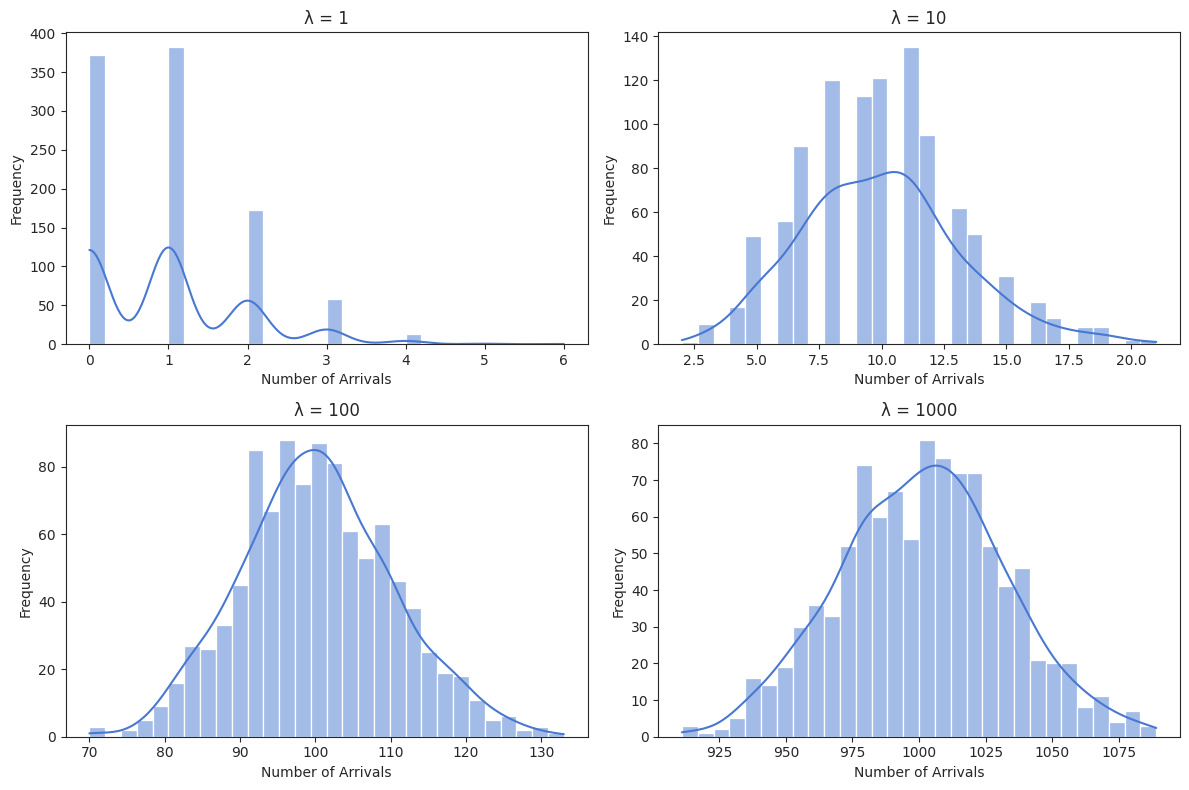

In [2]:
# Function to simulate daily customer arrivals based on mean rate (λ)
def customer_arrivals(mean_rate):
    return np.random.poisson(mean_rate)

# Test cases for customer arrivals
def test_customer_arrivals():
    # Values of λ to test (1, 10, 100, 1000)
    lambda_values = [1, 10, 100, 1000]
    n_realizations = 1000  # Number of realizations for each λ

    # Set up the plot for histograms
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    # Loop through each λ and run realizations
    for i, lam in enumerate(lambda_values):
        # Generate 1000 realizations
        realizations = [customer_arrivals(lam) for _ in range(n_realizations)]

        # Calculate mean and variance
        mean_realization = np.mean(realizations)
        variance_realization = np.var(realizations)

        # Print results
        print(f"λ = {lam}: Mean = {mean_realization:.2f}, Variance = {variance_realization:.2f}")

        # Plot histogram on the axes array
        sns.histplot(realizations, bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f"λ = {lam}")
        axes[i].set_xlabel("Number of Arrivals")
        axes[i].set_ylabel("Frequency")

    # Show plot
    plt.tight_layout()
    plt.show()

# Run the test function
test_customer_arrivals()


> Write a short explanation of your test cases.       

> **Answer:** For my test cases, I generated 1000 simulations of customer arrivals for each of four different values of $\lambda$: 1, 10, 100, and 1000. These values span a wide range from very low to very high average arrival rates to observe how the Poisson distribution behaves across different scales.

> - **For $\lambda$ = 1**: The histogram is very skewed to the right, with most realizations being 0 or 1. This is typical for very low arrival rates, where arrivals are rare.
> - **For $\lambda$ = 10**: The distribution is less skewed, and more realizations cluster around 10. It looks more bell-shaped but still with a slight skew to the right.
> - **For $\lambda$ = 100**: The distribution becomes more symmetric and almost bell-shaped, centered around 100, with a tighter spread
> - **For $\lambda$ = 1000**: The histogram is very symmetric and resembles a normal distribution centered around 1000, with a sligher spread and a little distortion in the bell curve.

As $\lambda$ increases, the distribution of arrivals becomes more symmetric and bell-shaped, moving from a highly skewed pattern to a nearly normal distribution. This makes sense because, for large $\lambda$, the Poisson distribution approaches a normal distribution.

The test cases effectively show how the arrival pattern shifts from low to high $\lambda$, demonstrating the behavior of the Poisson distribution at different scales.


### Simulate bread choice

The demand for the bread is simulated from a **categorical distribution**. Recalling the discussion in Chapter 7, for each customer arrival a choice of bread is made with probabilities, $\Pi = [\pi_1, \pi_2, \pi_3] = [0.5, 0.25, 0.25]$, for $[white, wheat, multigrain]$. We express density function of bread choice as:   

\begin{align}
f(white, wheat, multigrain) = Cat(\Pi)\\
\Pi = [\pi_1, \pi_2, \pi_3]
\end{align}

> **Exercise 10-3:** Create and test a function, named `bread_choice`, to simulate arriving customers' bread demand. The function takes three arguments, the number of arrivals, a list of bread choices, and the probabilities of those choices. The function returns a bread choice as a Numpy array of strings. Include some test cases for your function as follows:   
> 1. Create an array with the probabilities for the test cases in the rows. The first test case should be the default probabilities $[0.5,0.25,0.25]$. Create at least 3 other test cases with some extreme probability values, such as 0.0, 0.9, etc.    
> 2. For 100 arrivals, compute the bread choice array and use [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) to display a bar chart of the outcomes on a Matplotlib axes grid. Include a title so you can tell the cases apart. Set a [numpy.random.seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) so your test cases are reproducible.  



> **Computational Note:** To create the function described you should use the [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) function on the list of bread choices. The size argument is the number of customer arrivals, in this case. Thus, all the bread choices for a given day are made with one function call. In general, computing a vector of results with a single call is a computationally efficient approach. Many computational libraries, including Numpy, are optimized for **vectorized** calls.    

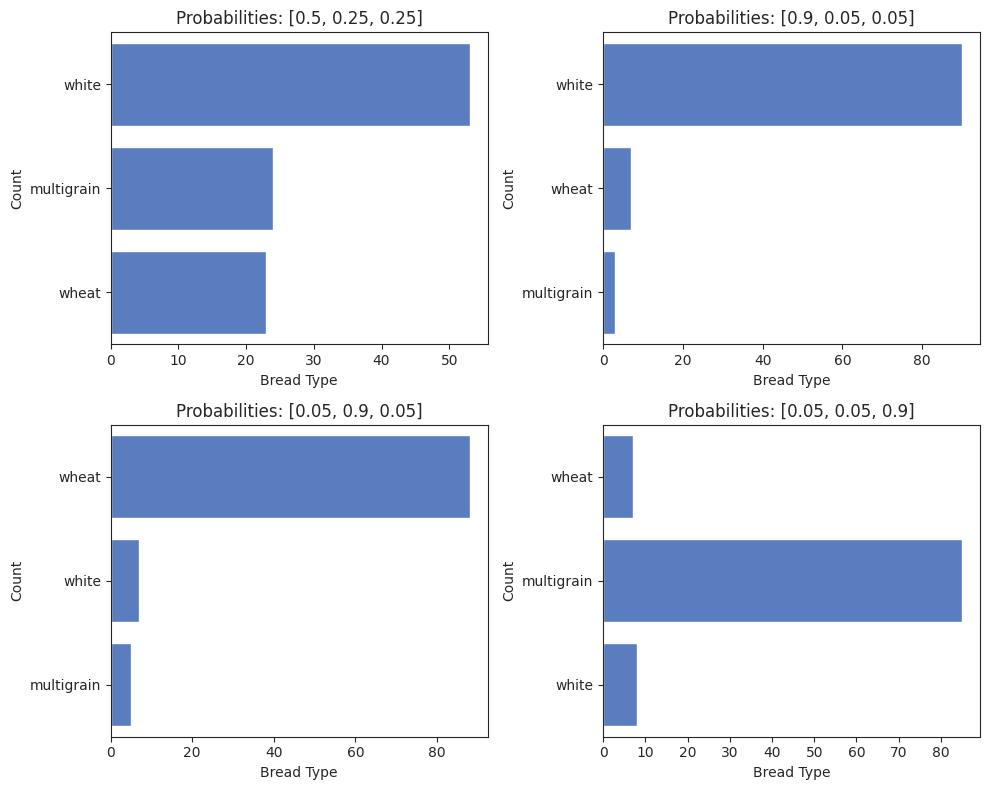

In [3]:
# Function to simulate bread choices for arriving customers
def bread_choice(n_arrivals, bread_types, bread_probs):
    return np.random.choice(bread_types, size=n_arrivals, p=bread_probs)

# Test cases for bread choice
def test_bread_choice():
    np.random.seed(42)  # Set seed for reproducibility

    # Bread types and test cases for probabilities
    bread_types = ["white", "wheat", "multigrain"]
    prob_cases = [
        [0.5, 0.25, 0.25],  # Default case
        [0.9, 0.05, 0.05],  # Extreme preference for white
        [0.05, 0.9, 0.05],  # Extreme preference for wheat
        [0.05, 0.05, 0.9]   # Extreme preference for multigrain
    ]

    n_arrivals = 100  # Number of arrivals for each test case

    # Set up the plot for bar charts
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    # Loop through each probability case and simulate bread choices
    for i, probs in enumerate(prob_cases):
        # Simulate bread choices for arrivals
        choices = bread_choice(n_arrivals, bread_types, probs)

        # Plot countplot for bread choices
        sns.countplot(choices, ax=axes[i])
        axes[i].set_title(f"Probabilities: {probs}")
        axes[i].set_xlabel("Bread Type")
        axes[i].set_ylabel("Count")

    # Show plot
    plt.tight_layout()
    plt.show()

# Run the test function
test_bread_choice()


> Keeping in mind that the outcomes of your tests are based on a randomly generated sample, does your function pass your tests?   

> **Answer:** Yes, the function passes the tests effectively. Here's why:

> Each subplot corresponds to one set of probabilities for bread choices, and the counts of each bread type in the bar plots reflect these probabilities well.

> - **Default Case [0.5, 0.25, 0.25]:** The most common choice is white bread, roughly half the total counts, followed by wheat and multigrain in equal but smaller proportions. This aligns with the given probabilities.

> - **[0.9, 0.05, 0.05] (Top-right):** White bread is heavily favored, with only a few instances of wheat and multigrain, matching the 90% probability.

> - **[0.05, 0.9, 0.05] (Bottom-left):** Wheat is overwhelmingly the choice, with very few selections of white and multigrain, consistent with the 90% chance for wheat.

> - **[0.05, 0.05, 0.9] (Bottom-right):** Multigrain dominates the choices, as expected with the 90% probability, and only a handful of white and wheat choices are seen.

> Overall, the distribution of choices aligns closely with the input probabilities, confirming that the function works correctly for generating bread demand based on the given distributions. While there might be some variation due to randomness, the function's results match the expected patterns.

### Simulate bread demand

Before you can compute daily profitability you must simulate bread demand for each day. The probabilities of demand for each type of bread are conditional on the number of arrivals and the bread choices. In mathematical terms we can write this relationship as $P(demand\ |\ arrivals, choice)$.

> **Exercise 10-4:** To compute this conditional distribution, you will write a function `bread_demand` with arguments of the mean arrival rate of customers, the choices of bread, and the probabilities of bread choice. This function computes the conditional distribution, $P(bread\ demand | customer\ arrivals, bread\ choice)$, using the `customer_arrivals` and `bread_choice` functions. The function will return a Numpy array of demand by bread type. Include 10 test cases, using $probabilities = [0.5,0.25,0.25]$ for white, wheat and multigrain bread choice, from which you print the total bread demand and the demand by bread type for 20 average arrivals.

In [4]:
# Function to compute daily bread demand based on customer arrivals and bread choices
def bread_demand(mean_arrival_rate, bread_types, bread_probs):
    # Get the number of arrivals using customer_arrivals
    n_arrivals = customer_arrivals(mean_arrival_rate)

    # Get bread choices for each arrival using bread_choice
    choices = bread_choice(n_arrivals, bread_types, bread_probs)

    # Count the demand for each bread type
    demand_counts = [np.sum(choices == bread) for bread in bread_types]

    return np.array(demand_counts)

# Test cases for bread demand
def test_bread_demand():
    np.random.seed(42)  # Set seed for reproducibility

    # Bread types and default probabilities
    bread_types = ["white", "wheat", "multigrain"]
    bread_probs = [0.5, 0.25, 0.25]  # Default case probabilities

    mean_arrival_rate = 20  # Average arrivals per day

    # Run 10 test cases
    for i in range(10):
        # Compute bread demand
        demand = bread_demand(mean_arrival_rate, bread_types, bread_probs)

        # Print the results for each test case
        print(f"Test Case {i+1}: Total Demand = {np.sum(demand)}, Demand by Bread Type = {dict(zip(bread_types, demand))}")

# Run the test function
test_bread_demand()


Test Case 1: Total Demand = 23, Demand by Bread Type = {'white': 15, 'wheat': 4, 'multigrain': 4}
Test Case 2: Total Demand = 20, Demand by Bread Type = {'white': 11, 'wheat': 5, 'multigrain': 4}
Test Case 3: Total Demand = 27, Demand by Bread Type = {'white': 15, 'wheat': 4, 'multigrain': 8}
Test Case 4: Total Demand = 18, Demand by Bread Type = {'white': 9, 'wheat': 6, 'multigrain': 3}
Test Case 5: Total Demand = 17, Demand by Bread Type = {'white': 7, 'wheat': 2, 'multigrain': 8}
Test Case 6: Total Demand = 27, Demand by Bread Type = {'white': 17, 'wheat': 5, 'multigrain': 5}
Test Case 7: Total Demand = 27, Demand by Bread Type = {'white': 13, 'wheat': 10, 'multigrain': 4}
Test Case 8: Total Demand = 14, Demand by Bread Type = {'white': 5, 'wheat': 4, 'multigrain': 5}
Test Case 9: Total Demand = 18, Demand by Bread Type = {'white': 7, 'wheat': 7, 'multigrain': 4}
Test Case 10: Total Demand = 16, Demand by Bread Type = {'white': 5, 'wheat': 7, 'multigrain': 4}


> Notice the range of total bead demand in the results of your test cases:  Does this behavior seem correct given the stochastic nature of the calculation, and why?    

> **Answer:** Yes, the behavior seems correct given the stochastic nature of the calculation. Here's why:

> - **Stochastic Variation in Arrivals:** Since customer_arrivals is based on a Poisson distribution with a mean arrival rate of 20, the actual number of arrivals varies around this mean across test cases. In some cases, there are more arrivals than 20 (e.g., Test Case 3 with 27 arrivals), and in others, fewer arrivals (e.g., Test Case 8 with 14 arrivals). This variability is expected due to the random nature of the Poisson process.

> - **Random Bread Choice:** The bread choice itself is also a stochastic process, with customers choosing between "white," "wheat," and "multigrain" based on their probabilities. Given that "white" has a higher probability (0.5), we see that most demands lean toward "white," but there is still randomness in how "wheat" and "multigrain" are selected.

> - **Range of Demand:** The total bread demand varies between 14 and 27 across test cases, which is a reasonable range given that the mean arrival rate is 20. Some natural fluctuation above and below this mean is expected. Additionally, the distribution of demand between bread types also varies but remains roughly proportional to the given probabilities.

> Overall, the variability in total bread demand and its distribution across bread types align well with the stochastic nature of the arrivals and bread choices. This is typical behavior for a Monte Carlo simulation based on these random processes.

> **Exercise 10-5:** The conditional distribution of the bread demand might not be obvious at first. To get a feel for this distribution you will now create histograms for the demand of each bread type over an approximately 4-year period. There are about 250 business days in a year, so that the histograms show the distribution of bread demand for 1,000 days, with a mean customer arrival rate of 100. Make sure these histograms have a reasonable aspect ratio (not elongated), and have proper labels.

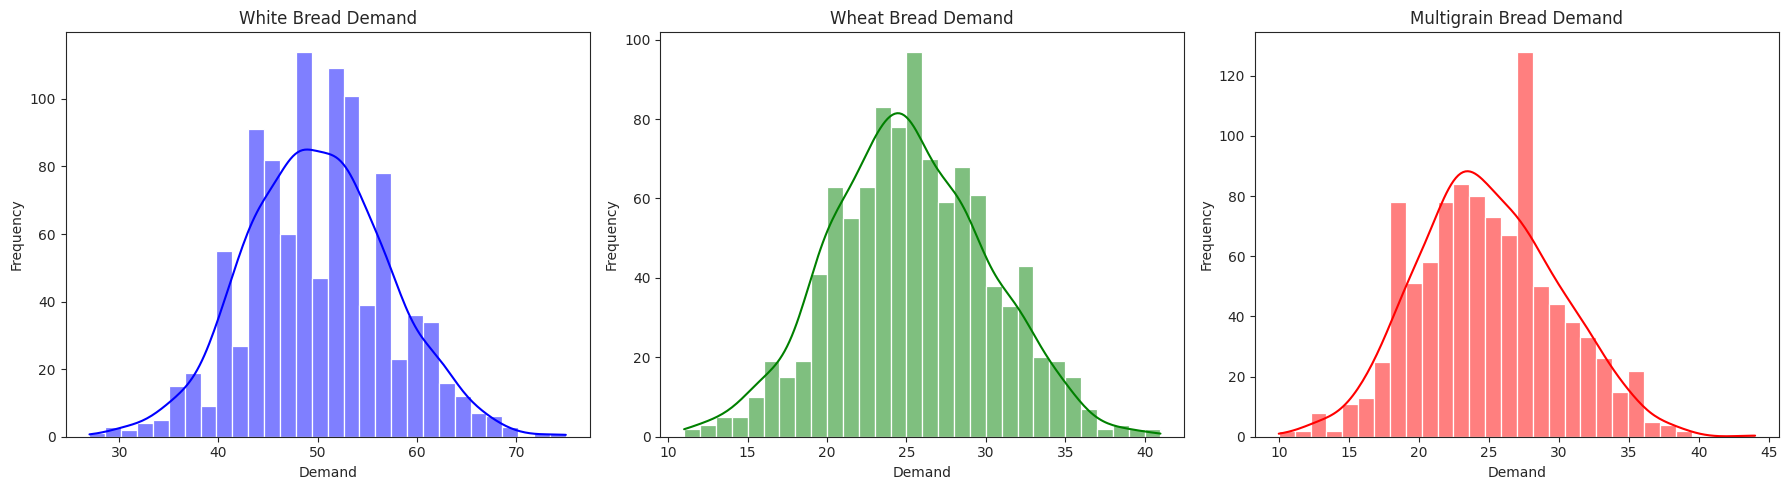

In [5]:
# Function to simulate bread demand over 1000 days
def simulate_bread_demand_over_days(n_days, mean_arrival_rate, bread_types, bread_probs):
    # Initialize demand arrays for each bread type
    demand_white = []
    demand_wheat = []
    demand_multigrain = []

    # Simulate demand for each day
    for _ in range(n_days):
        demand = bread_demand(mean_arrival_rate, bread_types, bread_probs)
        demand_white.append(demand[0])
        demand_wheat.append(demand[1])
        demand_multigrain.append(demand[2])

    return demand_white, demand_wheat, demand_multigrain

# Parameters for the simulation
n_days = 1000  # Simulating over 1,000 days
mean_arrival_rate = 100  # Mean customer arrival rate
bread_types = ["white", "wheat", "multigrain"]
bread_probs = [0.5, 0.25, 0.25]  # Probabilities for bread choices

# Simulate the demand over 1000 days
demand_white, demand_wheat, demand_multigrain = simulate_bread_demand_over_days(
    n_days, mean_arrival_rate, bread_types, bread_probs)

# Plot histograms of the demand for each bread type
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# White bread demand histogram
sns.histplot(demand_white, bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("White Bread Demand")
axes[0].set_xlabel("Demand")
axes[0].set_ylabel("Frequency")

# Wheat bread demand histogram
sns.histplot(demand_wheat, bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title("Wheat Bread Demand")
axes[1].set_xlabel("Demand")
axes[1].set_ylabel("Frequency")

# Multigrain bread demand histogram
sns.histplot(demand_multigrain, bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title("Multigrain Bread Demand")
axes[2].set_xlabel("Demand")
axes[2].set_ylabel("Frequency")

# Adjust layout for better aspect ratio
plt.tight_layout()
plt.show()


> Recalling that a Poisson distribution approaches the Normal for a large mean arrival rate. Do these histograms appear approximately Normal? Is this behavior expected, given that the distribution is conditional on a Poisson process and a uniformly distributed process?   

> **Answer:** Yes, the histograms appear approximately normal, which aligns with expectations. Given the large mean arrival rate ($\lambda=100$), the Poisson distribution approaches a normal shape. The distribution of demand for each bread type is a result of both the Poisson-distributed arrivals and the fixed choice probabilities $[0.5, 0.25, 0.25]$. These conditions lead to a roughly normal distribution for each bread type's demand, as seen in the histograms. This is typical given the large sample size and the random, proportional allocation of bread choices


### Simulate Bread Baked

The number of each type of bread baked in the sandwich shop is deterministic. The shop manager has a plan for the day, and the bread is baked in advance of the customer's arrival. Naturally, the manager will choose the proportion of each bread type based on the historical expected demand. This is a decision function. The decision to be made is how many total loaves to bake?    

> **Exercise 10-6:** Create a function `bread_baked` with arguments, the total number of loaves, the proportion of each bread type to bake, and the types of bread. The function will return a Pandas series with the number of each type of bread baked, and with index being bread type. Include a simple test case for your function.    

In [8]:
# Function to calculate the number of each type of bread to bake
def bread_baked(total_loaves, proportions, bread_types):
    # Calculate loaves for each type of bread
    loaves = [round(total_loaves * proportion) for proportion in proportions]

    # Return a Pandas Series with bread types as index
    return pd.Series(loaves, index=bread_types)

# Simple test case for the bread_baked function
def test_bread_baked():
    total_loaves = 200  # Total number of loaves to bake
    proportions = [0.5, 0.25, 0.25]  # Proportions for white, wheat, and multigrain
    bread_types = ["white", "wheat", "multigrain"]

    # Calculate the number of loaves to bake
    baked_loaves = bread_baked(total_loaves, proportions, bread_types)

    # Print the result
    print(baked_loaves)

# Run the test function
test_bread_baked()


white         100
wheat          50
multigrain     50
dtype: int64


> Is the result of the bread baked function deterministic and is the behavior expected for this variable and why?   

> **Answer:** Yes, the result of the `bread_baked` function is deterministic, and this behavior is expected. Here's why: The function uses fixed proportions and a given total number of loaves to bake, which means the output is always the same for the same input values. There is no randomness or variability in the process. Since the bread is baked in advance based on a planned strategy (using known proportions of demand), the output should not vary day-to-day for the same plan. The deterministic nature aligns with the scenario where the shop manager prepares a fixed number of loaves based on historical demand.

> So, the function behaves as expected, returning the exact number of loaves for each bread type based on the set proportions and total number to bake

### Simulate and plot profit

The last function you need to execute the full model represented by the DAG computes the daily profit. This function is therefore the utility function. The calculation is deterministic, given the inputs of bread demand and the amount of bread baked. But don't be confused, while the utility function is deterministic, the bread demands is stochastic. As a result, profit is a random variable.

> **Exercise 10-7:** You will now write the function, `daily_profit`, that computes and returns the daily profit. The function calls the `bread_demand` and `bread_baked` functions. Your function will have the following characteristics:      
> 1. The arguments to this function are:     
>     - The daily total of bread baked,    
>     - Proportion of each bread type baked daily,    
>     - Mean daily arrival rate,    
>     - Probabilities of bread choices,    
>     - Amount earned per sandwich sold,   
>     - Cost of discarded bread,    
>     - Bread choices.
> 2. Bread demand and supply by type are computed using the functions you have already created.       
> 3. Iterate over the bread types and compute if there is left-over bread of that type. Then compute profit based on the cases if excess demand (limited by bread supply) or excess bread (cost of disposal) to compute the daily profit.
> 4. Return the daily profit.
> Include and execute code to test your function.  

In [16]:
def daily_profit(total_baked, bake_proportions, mean_arrival_rate, bread_probs,
                 revenue_per_sandwich, cost_per_discarded, bread_types):
    # Compute demand for each type of bread
    demand = bread_demand(mean_arrival_rate, bread_types, bread_probs)
    #print(f"Demand: {dict(zip(bread_types, demand))}")

    # Compute supply for each type of bread
    supply = bread_baked(total_baked, bake_proportions, bread_types)
    #print(f"Supply: {supply.to_dict()}")

    # Initialize profit
    profit = 0

    # Iterate over bread types to compute profit
    for i, bread in enumerate(bread_types):
        # Calculate excess bread or demand for the current bread type
        #print(f"\nCalculating for bread type: {bread}")
        if demand[i] >= supply.iloc[i]:  # Demand exceeds or equals supply
            sold_loaves = supply.iloc[i]
            profit += sold_loaves * revenue_per_sandwich  # All supply is sold
            #print(f"  Demand exceeds or equals supply: Sold {sold_loaves} loaves")
        else:  # Supply exceeds demand
            sold_loaves = demand[i]
            excess = supply.iloc[i] - demand[i]  # Bread left over
            profit += (sold_loaves * revenue_per_sandwich)  # Sold bread profit
            profit -= excess * cost_per_discarded  # Cost for discarded bread
            #print(f"  Supply exceeds demand: Sold {sold_loaves} loaves, discarded {excess} loaves")

        # Print the intermediate profit calculation
        #print(f"  Intermediate profit: ${profit:.2f}")

    return profit

# Test case for daily_profit function
def test_daily_profit():
    # Parameters for the test
    total_baked = 200  # Total loaves baked
    bake_proportions = [0.5, 0.25, 0.25]  # Proportions for white, wheat, multigrain
    mean_arrival_rate = 100  # Mean arrival rate
    bread_probs = [0.5, 0.25, 0.25]  # Bread choice probabilities
    revenue_per_sandwich = 1.0  # Revenue per sandwich sold
    cost_per_discarded = 0.25  # Cost per loaf discarded
    bread_types = ["white", "wheat", "multigrain"]

    # Compute and print daily profit
    profit = daily_profit(total_baked, bake_proportions, mean_arrival_rate, bread_probs,
                          revenue_per_sandwich, cost_per_discarded, bread_types)
    print(f"\nFinal Daily Profit: ${profit:.2f}")

# Run the test function
test_daily_profit()



Final Daily Profit: $71.25


> Keeping in mind that the maximum profit is the number of sandwiches sold times the profit per sandwich less the cost of bread, does the value computed make sense and why?    

> **Answer:** Yes, the value computed ($\$71.25$) aligns with expectations, as it reflects the balance between revenue from sandwiches sold and costs incurred from unsold bread. The maximum possible profit is adjusted downward due to the wasted loaves, which are correctly factored into the final profit. This confirms that the function's logic is sound and operates as intended within the parameters of the scenario

> **Exercise 10-8:** The distribution of daily profit is, as yet, unknown. Further, you will need to test your `daily_profit` function. In order to work towad these goals, you will now simulate 4 year's (1000 business days) profits and plot the result as a histogram. Use a mean arrival rate of 100 and 100 breads baked per day.    

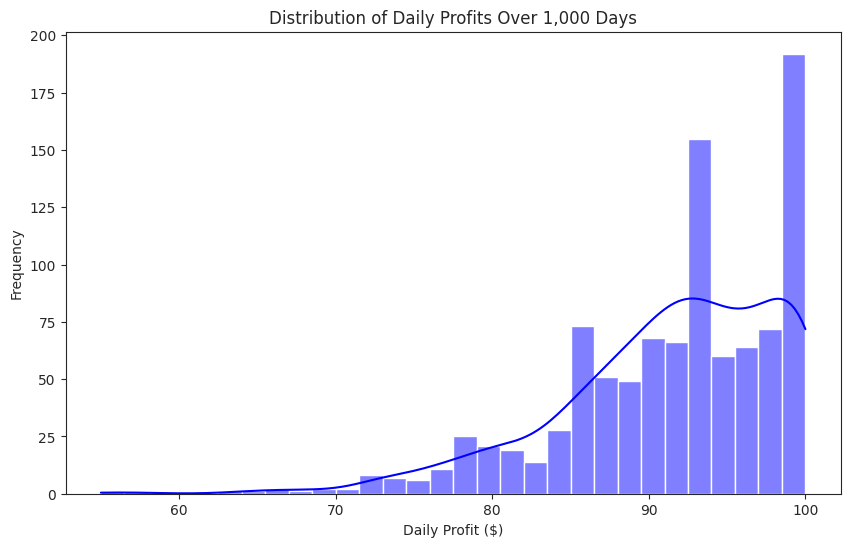

In [17]:
def simulate_profit_over_days(n_days, total_baked, bake_proportions, mean_arrival_rate,
                              bread_probs, revenue_per_sandwich, cost_per_discarded, bread_types):
    # List to store daily profits
    daily_profits = []

    # Simulate daily profits over n_days
    for _ in range(n_days):
        profit = daily_profit(total_baked, bake_proportions, mean_arrival_rate, bread_probs,
                              revenue_per_sandwich, cost_per_discarded, bread_types)
        daily_profits.append(profit)

    return daily_profits

# Parameters for the simulation
n_days = 1000  # Simulating over 1,000 days
total_baked = 100  # Total loaves baked per day
bake_proportions = [0.5, 0.25, 0.25]  # Proportions for white, wheat, and multigrain
mean_arrival_rate = 100  # Mean arrival rate
bread_probs = [0.5, 0.25, 0.25]  # Bread choice probabilities
revenue_per_sandwich = 1.0  # Revenue per sandwich sold
cost_per_discarded = 0.25  # Cost per loaf discarded
bread_types = ["white", "wheat", "multigrain"]

# Simulate the daily profits over 1000 days
profits = simulate_profit_over_days(n_days, total_baked, bake_proportions, mean_arrival_rate,
                                    bread_probs, revenue_per_sandwich, cost_per_discarded, bread_types)

# Plot the histogram of daily profits
plt.figure(figsize=(10, 6))
sns.histplot(profits, bins=30, kde=True, color='blue')
plt.title("Distribution of Daily Profits Over 1,000 Days")
plt.xlabel("Daily Profit ($)")
plt.ylabel("Frequency")
plt.show()


> Examine your histogram and answer these questions:       
> 1. Does the distribution of profit resemble the distribution of arrivals or the distribution of bread baked?    
> 2. Does the sharp cut-off at a maximum make sense to give the problem?       
> 3. Do the characteristics of this distribution indicate that it can only be found by a computational method?

 > **Answers:**

 > 1. The distribution of profit does not closely resemble the distribution of arrivals, which would be more symmetric around its mean, like a normal distribution. Instead, it is skewed, with a peak at the higher end of the profit range. This is due to the limited number of loaves baked (100), which constrains the profit potential. The distribution of profit more closely resembles the distribution of bread baked, as the fixed total loaves limit how much profit can be made

 > 2. Yes, the sharp cut-off at the maximum profit makes sense. The maximum possible profit is constrained by the number of loaves baked (100) and the revenue per sandwich ($\$1.00$). Once all loaves are sold (with no excess or waste), profit cannot exceed this value, resulting in the cut-off around $\$100$

 > 3. Yes, the characteristics of this distribution indicate it must be found using computational methods. The profit distribution depends on both the stochastic arrivals and the random bread choices, which are difficult to model analytically. The interaction of multiple variables (e.g., arrivals, bread types, demand vs. supply) and the conditions around profit calculations make the distribution complex, necessitating simulation to observe its behavior accurately


### Stochastic Nature of Simulation

The key question of interest to the manager of the sandwich shop is the number of loaves of bread to bake to simulate profitability. Thus, there is only one decision variable in this case. We should be able to search a reasonable space of values to find the one which optimizes the profit of the shop.  

But, there is still the issue of how much the results of this simulation vary from run to run. This means, there is considerable uncertainty or variability in the daily profit. Running a simulation multiple times yields the **posterior distribution** of the variables being simulated. In this case we are interested in the posterior distribution of the profitability vs. the number of breads baked.

> **Exercise 10-9:** Running the simulation of daily profit for different numbers of bread baked will help to quantify the choice and uncertainty in the number of bread to bake each day. You will perform the simulations for 4 business years (1000 days) and for number of bread baked $= [60, 80, 100, 120, 140, 160]$, using the same proportions as before. For each quantity of bread baked you will do the following:     
> 1. Create an empty Pandas data frame columns, `num_baked`, and `profit`. The number of rows is the product of the number of bread baked by the number of realizations of profit for each quantity of bread baked, `index=range(len(num_bread_baked * num_realizations))`.    
> 2. Iterate over the number of bread baked. For each number of breads, compute 1000 realizations of customer arrivals along with the daily profit for the sandwich shop.    
> 3. Create a box plot showing the realizations of profit on the vertical axis and the number of breads baked on the horizontal axis.   
> 4. Display the result of grouping the data frame by `num_baked` and then apply the `describe` method.     


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


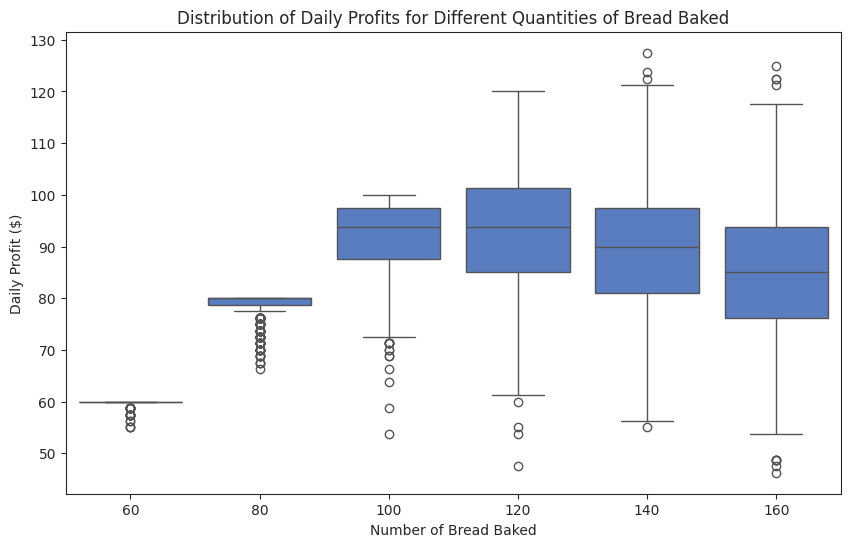

            count  unique     top   freq
num_baked                               
60         1000.0     5.0   60.00  970.0
80         1000.0    12.0   80.00  702.0
100        1000.0    30.0  100.00  153.0
120        1000.0    52.0   91.25   53.0
140        1000.0    57.0   92.50   47.0
160        1000.0    58.0   86.25   54.0


In [18]:
def simulate_multiple_bread_quantities(num_bread_baked, n_days, bake_proportions, mean_arrival_rate,
                                       bread_probs, revenue_per_sandwich, cost_per_discarded, bread_types):
    # Create empty DataFrame to store results
    df_results = pd.DataFrame(columns=['num_baked', 'profit'], index=range(len(num_bread_baked) * n_days))

    # Iterate over different numbers of bread baked
    index = 0
    for baked in num_bread_baked:
        # Simulate profit over n_days
        profits = simulate_profit_over_days(n_days, baked, bake_proportions, mean_arrival_rate,
                                            bread_probs, revenue_per_sandwich, cost_per_discarded, bread_types)

        # Store results in DataFrame
        df_results.loc[index:index+n_days-1, 'num_baked'] = baked
        df_results.loc[index:index+n_days-1, 'profit'] = profits
        index += n_days

    return df_results

# Parameters for the simulation
n_days = 1000  # Simulating over 1,000 days
num_bread_baked = [60, 80, 100, 120, 140, 160]  # Different quantities of bread baked per day
bake_proportions = [0.5, 0.25, 0.25]  # Proportions for white, wheat, and multigrain
mean_arrival_rate = 100  # Mean arrival rate
bread_probs = [0.5, 0.25, 0.25]  # Bread choice probabilities
revenue_per_sandwich = 1.0  # Revenue per sandwich sold
cost_per_discarded = 0.25  # Cost per loaf discarded
bread_types = ["white", "wheat", "multigrain"]

# Simulate profits for different quantities of bread baked
df_profits = simulate_multiple_bread_quantities(num_bread_baked, n_days, bake_proportions,
                                                mean_arrival_rate, bread_probs, revenue_per_sandwich,
                                                cost_per_discarded, bread_types)

# Plot box plot for the profits
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_baked', y='profit', data=df_profits)
plt.title("Distribution of Daily Profits for Different Quantities of Bread Baked")
plt.xlabel("Number of Bread Baked")
plt.ylabel("Daily Profit ($)")
plt.show()

# Group and describe the results by num_baked
grouped_summary = df_profits.groupby('num_baked')['profit'].describe()
print(grouped_summary)


> Answer these questions:      
> 1. How does the variability of daily profit change with the number of breads baked?     
> 2. Which number of bread baked have the highest mean and median daily profits, and do you think the difference with the next highest is significant?    
> 3. Given these mean and median values and the risk of low daily profits seen in the variability, which a number of bread baked should the shop manager choose and why?  

> **Answers:**

> 1. The variability in daily profit increases as the number of loaves baked rises. When fewer loaves are baked (60 or 80), profit is more predictable but lower, as there is not much excess bread. As the number of loaves baked increases to 120, 140, and 160, the range of possible profits widens significantly, indicating that excess bread may either boost sales or result in wastage

> 2. The number of loaves baked that has the highest mean and median daily profit is 120. However, the difference in mean and median profits between baking 120 and 100 loaves is small. The profits for 120 loaves are slightly higher, but the increase may not be significantly greater when considering the added variability and risk.

> 3. Baking 100 loaves strikes a balance between maximizing daily profit while minimizing the risk of variability and loss from unsold bread. Although baking 120 loaves yields a slightly higher mean and median profit, the increased variability introduces more risk of low daily profits, particularly from wastage. Thus, 100 loaves offer a safer and more stable profit margin


## Extensions of the Simulation   

The foregoing simulation has given some insight into the relationship between bread baked and the profitability of the sandwich shop. But of course, the real world is much more complicated. Some examples of real-world complexity that could be accounted for in a more complete simulation include:      
- The arrival rate of customers may change with the day of the week or the season of the year.   
- Other inventory items, besides bread, that are also perishable and have costs.    
- The labor costs for the shop can be variable depending on a finer grain time scale. For example, if most customers arrive within a short window of time more employees are required to meet the surge in demand.     

> **Exercise 10-10:** Consider some other real-world complications which could be accounted for in a more complete simulation. What are they? How could you model these factors?    

> **Answer:** Some additional real-world complications that could be accounted for in a more complete simulation include:

> 1. Variable Customer Demand (Time-of-Day and Day-of-Week Effects): Customer arrivals vary by time of day (e.g., lunch rush) and day of the week (e.g., weekends vs. weekdays). This would need the use of different Poisson rates for different periods within a day and for each day of the week, capturing peaks and troughs in demand.

> 2. Inventory and Waste Management: Unused bread leads to waste, and managing inventory effectively is crucial to minimize losses. To model this, we'd introduce an alternative use for leftover bread (e.g., repurposing into other products) or variable costs for unsold bread (e.g., donations). Also, track ingredient stock to limit the number of loaves baked.

> 3. External Influences on Demand (Weather & Promotions): Demand can be affected by weather, holidays, or special promotions. We'd have to use external factors like weather conditions or marketing events to model this scenario, adjusting the probability of customer arrivals or bread choices dynamically.



## Bibliography

#### Copyright 2020, 2021, 2022, 2023 Stephen F Elston. All rights reserved.